In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier #for the model
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz #plot tree
from sklearn.metrics import roc_curve, auc #for model evaluation
from sklearn.metrics import classification_report #for model evaluation
from sklearn.metrics import confusion_matrix #for model evaluation
from sklearn.model_selection import train_test_split #for data splitting
import eli5 #for purmutation importance
from eli5.sklearn import PermutationImportance
import shap #for SHAP values
from pdpbox import pdp, info_plots #for partial plots
np.random.seed(123) #ensure reproducibility

pd.options.mode.chained_assignment = None  #hide any pandas warnings

In [38]:
!pip install eli5

In [39]:
!pip install pdpbox

In [40]:
!pip install shap

In [41]:
from google.colab import files
uploaded=files.upload()

Saving heart.csv to heart (1).csv


In [86]:
df=pd.read_csv('heart.csv')

In [87]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [88]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [44]:
df.shape

(303, 14)

In [89]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


In [45]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [46]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [47]:
df.columns = ['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 'cholesterol', 'fasting_blood_sugar', 'rest_ecg', 'max_heart_rate_achieved',
       'exercise_induced_angina', 'st_depression', 'st_slope', 'num_major_vessels', 'thalassemia', 'target']

In [48]:
df['sex'][df['sex']==0]='female'
df['sex'][df['sex']==1]='male'

df['chest_pain_type'][df['chest_pain_type'] == 1] = 'typical angina'
df['chest_pain_type'][df['chest_pain_type'] == 2] = 'atypical angina'
df['chest_pain_type'][df['chest_pain_type'] == 3] = 'non-anginal pain'
df['chest_pain_type'][df['chest_pain_type'] == 4] = 'asymptomatic'

df['fasting_blood_sugar'][df['fasting_blood_sugar'] == 0] = 'lower than 120mg/ml'
df['fasting_blood_sugar'][df['fasting_blood_sugar'] == 1] = 'greater than 120mg/ml'

df['rest_ecg'][df['rest_ecg'] == 0] = 'normal'
df['rest_ecg'][df['rest_ecg'] == 1] = 'ST-T wave abnormality'
df['rest_ecg'][df['rest_ecg'] == 2] = 'left ventricular hypertrophy'

df['exercise_induced_angina'][df['exercise_induced_angina'] == 0] = 'no'
df['exercise_induced_angina'][df['exercise_induced_angina'] == 1] = 'yes'

df['st_slope'][df['st_slope'] == 1] = 'upsloping'
df['st_slope'][df['st_slope'] == 2] = 'flat'
df['st_slope'][df['st_slope'] == 3] = 'downsloping'

df['thalassemia'][df['thalassemia'] == 1] = 'normal'
df['thalassemia'][df['thalassemia'] == 2] = 'fixed defect'
df['thalassemia'][df['thalassemia'] == 3] = 'reversable defect'

In [49]:
df.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target
0,63,male,non-anginal pain,145,233,greater than 120mg/ml,normal,150,no,2.3,0,0,normal,1
1,37,male,atypical angina,130,250,lower than 120mg/ml,ST-T wave abnormality,187,no,3.5,0,0,fixed defect,1
2,41,female,typical angina,130,204,lower than 120mg/ml,normal,172,no,1.4,flat,0,fixed defect,1
3,56,male,typical angina,120,236,lower than 120mg/ml,ST-T wave abnormality,178,no,0.8,flat,0,fixed defect,1
4,57,female,0,120,354,lower than 120mg/ml,ST-T wave abnormality,163,yes,0.6,flat,0,fixed defect,1


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      303 non-null    int64  
 1   sex                      303 non-null    object 
 2   chest_pain_type          303 non-null    object 
 3   resting_blood_pressure   303 non-null    int64  
 4   cholesterol              303 non-null    int64  
 5   fasting_blood_sugar      303 non-null    object 
 6   rest_ecg                 303 non-null    object 
 7   max_heart_rate_achieved  303 non-null    int64  
 8   exercise_induced_angina  303 non-null    object 
 9   st_depression            303 non-null    float64
 10  st_slope                 303 non-null    object 
 11  num_major_vessels        303 non-null    int64  
 12  thalassemia              303 non-null    object 
 13  target                   303 non-null    int64  
dtypes: float64(1), int64(6), o

In [51]:
dt=df
dt['sex'] = dt['sex'].astype('object')
dt['chest_pain_type'] = dt['chest_pain_type'].astype('object')
dt['fasting_blood_sugar'] = dt['fasting_blood_sugar'].astype('object')
dt['rest_ecg'] = dt['rest_ecg'].astype('object')
dt['exercise_induced_angina'] = dt['exercise_induced_angina'].astype('object')
dt['st_slope'] = dt['st_slope'].astype('object')
dt['thalassemia'] = dt['thalassemia'].astype('object')

In [52]:
X = dt.drop(columns=["target"])
Y = dt[["target"]]

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.15, random_state=10)

In [54]:
pip install feature-engine

In [55]:
from feature_engine.encoding import OneHotEncoder
to_encode = ["sex", "chest_pain_type", "fasting_blood_sugar","rest_ecg",	"exercise_induced_angina", "st_slope", "thalassemia"]

# Configuração do encoder
encoder = OneHotEncoder(variables=to_encode, drop_last=False)

# fit tdo encoder
encoder.fit(X_train)

# transformando os dados
X_train= encoder.transform(X_train)
X_test= encoder.transform(X_test)

In [56]:
# Normalização das variáveis

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Transformand para dataframe para visualização
X_train = pd.DataFrame(X_train_scaled,columns = X_train.columns)
X_test = pd.DataFrame(X_test_scaled,columns = X_test.columns)

In [57]:
X_train.head()

,age,resting_blood_pressure,cholesterol,max_heart_rate_achieved,st_depression,num_major_vessels,sex_male,sex_female,chest_pain_type_non-anginal pain,chest_pain_type_0,chest_pain_type_atypical angina,chest_pain_type_typical angina,fasting_blood_sugar_lower than 120mg/ml,fasting_blood_sugar_greater than 120mg/ml,rest_ecg_ST-T wave abnormality,rest_ecg_normal,rest_ecg_left ventricular hypertrophy,exercise_induced_angina_yes,exercise_induced_angina_no,st_slope_upsloping,st_slope_flat,st_slope_0,thalassemia_reversable defect,thalassemia_fixed defect,thalassemia_normal,thalassemia_0
0,0.187500,0.245283,0.239726,0.847328,0.612903,0.00,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.395833,0.264151,0.219178,0.877863,0.000000,0.00,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,0.291667,0.339623,0.431507,0.694656,0.306452,0.25,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,0.833333,0.622642,0.246575,0.458015,0.016129,0.25,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.604167,0.358491,0.223744,0.778626,0.516129,0.50,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0


In [58]:
from sklearn.model_selection import GridSearchCV

params_grid = {
          "C":(0.01, 1, 10, 100), 
          "penalty":("l1","l2")
}


In [59]:
from sklearn.linear_model import  LogisticRegression
# Create a based model
clf = LogisticRegression()

# Instantiate the grid search model
grid_search = GridSearchCV(estimator=clf, param_grid=params_grid, n_jobs=-1, cv=3, verbose=0)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': (0.01, 1, 10, 100), 'penalty': ('l1', 'l2')})

In [60]:
print(grid_search.best_params_)
best_rf = grid_search.best_estimator_

{'C': 10, 'penalty': 'l2'}


In [61]:
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score

y_pred = best_rf.predict(X_test)


f1 = round(f1_score(y_test, y_pred, average='macro')*100, 2)
accuracy = round(accuracy_score(y_test, y_pred)*100,2)
precision = round(precision_score(y_test, y_pred)*100,2)
recall = round(recall_score(y_test, y_pred)*100,2)


print(f"F1 Score: {f1}%")
print(f"Accuracy Score: {accuracy}%")
print(f"Precision Score: {precision}%")
print(f"Recall Score: {recall}%")

metricas = {}
metricas["LogisticRegression"]={
                            "accuracy":accuracy,
                            "precision":precision,
                            "recall":recall,
                            "f1":f1
                            }

F1 Score: 81.75%
Accuracy Score: 82.61%
Precision Score: 82.35%
Recall Score: 73.68%


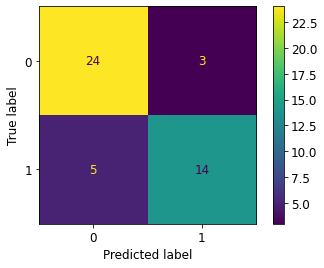

In [62]:
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt  


plot_confusion_matrix(best_rf, X_test, y_test, values_format='d')  
plt.grid(False)
plt.show()

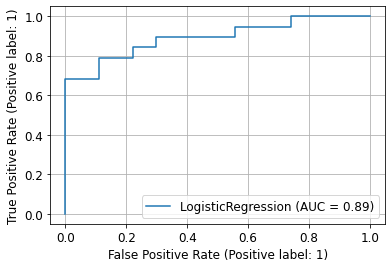

In [63]:
from sklearn.metrics import plot_roc_curve

# Curva ROC
plot_roc_curve(best_rf, X_test, y_test)  
plt.grid()
plt.show()

In [64]:
from sklearn.ensemble import RandomForestClassifier

params_grid = {
    'max_depth': [100, 150],
    'max_features': [3, 4, 5],
    'criterion':['gini', 'entropy'],
    'min_samples_leaf': [1,2,3],
    'min_samples_split': [2, 3, 8, 10],
    'n_estimators': [200,300,400]
}

In [67]:
! pip install scikit-optimize


     |████████████████████████████████| 100 kB 4.1 MB/s 


In [68]:
from skopt import BayesSearchCV

# Create a based model
clf = RandomForestClassifier()

# Instantiate the grid search model
bayes_search = BayesSearchCV(estimator=clf, search_spaces=params_grid, n_jobs=-1, cv=3, verbose=0)

# # Fit the grid search to the data
bayes_search.fit(X_train, y_train)

BayesSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
              search_spaces={'criterion': ['gini', 'entropy'],
                             'max_depth': [100, 150], 'max_features': [3, 4, 5],
                             'min_samples_leaf': [1, 2, 3],
                             'min_samples_split': [2, 3, 8, 10],
                             'n_estimators': [200, 300, 400]})

In [69]:
print(bayes_search.best_params_)
best_rf = bayes_search.best_estimator_

OrderedDict([('criterion', 'gini'), ('max_depth', 146), ('max_features', 4), ('min_samples_leaf', 1), ('min_samples_split', 2), ('n_estimators', 400)])


In [70]:
y_pred = best_rf.predict(X_test)

f1 = round(f1_score(y_test, y_pred, average='macro')*100, 2)
accuracy = round(accuracy_score(y_test, y_pred)*100,2)
precision = round(precision_score(y_test, y_pred)*100,2)
recall = round(recall_score(y_test, y_pred)*100,2)


print(f"F1 Score: {f1}%")
print(f"Accuracy Score: {accuracy}%")
print(f"Precision Score: {precision}%")
print(f"Recall Score: {recall}%")

metricas["RandomForest"]={
                            "accuracy":accuracy,
                            "precision":precision,
                            "recall":recall,
                            "f1":f1
}


F1 Score: 86.55%
Accuracy Score: 86.96%
Precision Score: 84.21%
Recall Score: 84.21%


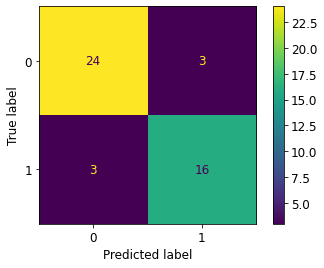

In [71]:
# Matriz de confusão

plot_confusion_matrix(best_rf, X_test, y_test, values_format='d')  
plt.grid(False)
plt.show()

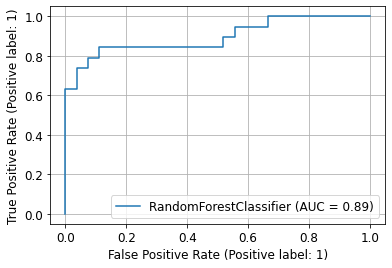

In [72]:
# Curva ROC
plot_roc_curve(best_rf, X_test, y_test)  
plt.grid()
plt.show()

In [82]:
resumo = pd.DataFrame.from_dict(metricas, orient='index')

In [83]:
resumo

,accuracy,precision,recall,f1
LogisticRegression,82.61,82.35,73.68,81.75
RandomForest,86.96,84.21,84.21,86.55
SVM,86.96,84.21,84.21,86.55
